In [ ]:
# based off of https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [2]:
import helper

In [3]:
translator, data, targets = helper.get_data("../mel-grams")

In [4]:
data = helper.image_processor(data)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

In [6]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=27,weights='distance', metric="manhattan" )
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, neigh.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.53      0.73      0.62        11
           2       0.14      0.04      0.06        26
           3       0.40      0.25      0.31        24
           4       0.39      0.48      0.43        27
           5       0.19      0.62      0.29        16
           6       0.33      0.94      0.49        18
           7       0.71      0.52      0.60        23
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        20

    accuracy                           0.34       200
   macro avg       0.29      0.37      0.29       200
weighted avg       0.29      0.34      0.28       200


0.34


/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


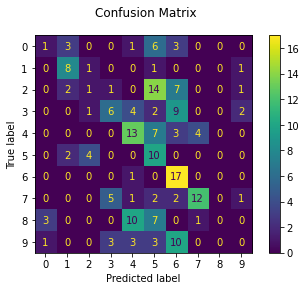

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

disp.figure_.savefig("default_knn.png")

## Convert RGBA to RGB
See: https://www.w3schools.com/html/html_colors_rgb.asp 
RGBA is just RGB with an added value to determine opacity

performance seems to have deteriorated, see confusion matrix

In [9]:
translator, data, targets = helper.get_data("../mel-grams")

# bypass the image processor in helper to invoke skimage "color" directly
from skimage import color
data = [color.rgba2rgb(img).reshape(-1) for img in data]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=27,weights='distance', metric="manhattan")
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, neigh.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.53      0.73      0.62        11
           2       0.14      0.04      0.06        26
           3       0.40      0.25      0.31        24
           4       0.39      0.48      0.43        27
           5       0.19      0.62      0.29        16
           6       0.33      0.94      0.49        18
           7       0.71      0.52      0.60        23
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        20

    accuracy                           0.34       200
   macro avg       0.29      0.37      0.29       200
weighted avg       0.29      0.34      0.28       200


0.34


/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


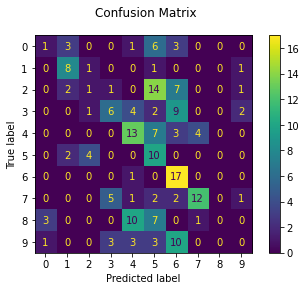

In [13]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
disp.figure_.savefig("rgb_rgba_knn.png")

# Training with Chroma

In [14]:
import helper
translator, data, targets = helper.get_data("../chroma")
data = helper.image_processor(data)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

In [16]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=27,weights='distance', metric="manhattan")
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, neigh.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.07      0.08        14
           1       0.17      0.27      0.21        11
           2       0.45      0.50      0.47        26
           3       0.47      0.33      0.39        24
           4       0.28      0.19      0.22        27
           5       1.00      0.19      0.32        16
           6       0.16      0.67      0.25        18
           7       0.50      0.13      0.21        23
           8       0.00      0.00      0.00        21
           9       0.09      0.10      0.10        20

    accuracy                           0.25       200
   macro avg       0.32      0.24      0.22       200
weighted avg       0.33      0.25      0.24       200


0.25


/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


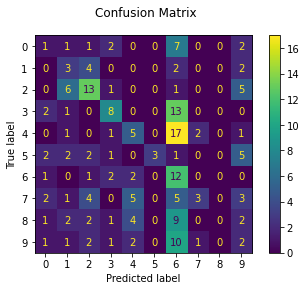

In [18]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
disp.figure_.savefig("chroma_knn.png")

# Training with Tonnetz

In [19]:
import helper
translator, data, targets = helper.get_data("../tonnetz")
data = helper.image_processor(data)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

In [21]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=27,weights='distance', metric="manhattan")
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, neigh.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.14      0.17        14
           1       0.00      0.00      0.00        11
           2       1.00      0.04      0.07        26
           3       0.00      0.00      0.00        24
           4       0.15      0.85      0.25        27
           5       1.00      0.19      0.32        16
           6       0.20      0.06      0.09        18
           7       0.20      0.13      0.16        23
           8       1.00      0.05      0.09        21
           9       0.12      0.05      0.07        20

    accuracy                           0.17       200
   macro avg       0.39      0.15      0.12       200
weighted avg       0.40      0.17      0.12       200


0.175


/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


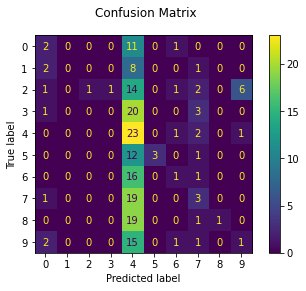

In [23]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
disp.figure_.savefig("tonnetz_knn.png")

# Inverted Colors

In [24]:
import helper
translator, data, targets = helper.get_data("../mel-grams")
data = helper.image_processor(data)

from skimage import util
data = [util.invert(img).reshape(-1) for img in data]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=27,weights='distance',metric="manhattan")
neigh.fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, neigh.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.53      0.73      0.62        11
           2       0.14      0.04      0.06        26
           3       0.40      0.25      0.31        24
           4       0.39      0.48      0.43        27
           5       0.19      0.62      0.29        16
           6       0.33      0.94      0.49        18
           7       0.71      0.52      0.60        23
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        20

    accuracy                           0.34       200
   macro avg       0.29      0.37      0.29       200
weighted avg       0.29      0.34      0.28       200


0.34


/Users/jzl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


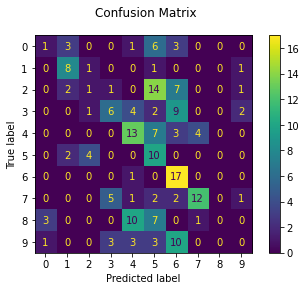

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics

disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
disp.figure_.savefig("inverted_colors.png")